# Pattern matching analysis
### Author: Krzysztof Chmielewski
In this section i will compare few pattern finding algorithms. We need to import those algorithms from `utils` directory and also import suffix structures.

In [1]:
import time, psutil, os, sys
import pandas as pd

# Importing suffix structures
from ukkonen import SuffixTree
from suffix_array import SuffixArray

# Importing pattern finding algoritms from previous labs
from utils.naive_pattern_matching import naive_pattern_match
from utils.kmp_algorithm import kmp_pattern_match
from utils.boyer_moore_algorithm import boyer_moore_pattern_match
from utils.rabin_karp_algorithm import rabin_karp_pattern_match
from utils.aho_corasick_algorithm import AhoCorasick

In [2]:
def get_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024  # in KB

In [3]:
def compare_pattern_matching_algorithms(text: str, pattern: str) -> dict:
    """
    Compare the performance of different pattern matching algorithms.
 
    Args:
        text: The text to search in
        pattern: The pattern to search for
 
    Returns:
        A dictionary containing the results of each algorithm:
        - Execution time in milliseconds
        - Memory usage in kilobytes
        - Number of character comparisons made
        - Positions where the pattern was found
    """
    prior_mem = get_memory_usage()

    # Implement algorithm comparisons
    # For each algorithm:
    #   1. Measure execution time
    #   2. Measure memory usage
    #   3. Count character comparisons
    #   4. Find pattern positions

    # Measuring time and memory usage

    # Naive algorithm time exec and mem usage
    start_time = time.time()
    naive_result, naive_compares = naive_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_naive = get_memory_usage()
    naive_time_exec = (end_time - start_time) * 1000
    naive_mem_usage = mem_after_naive - prior_mem

    # Suffix array time exec and mem usage
    sa = SuffixArray(text)
    start_time = time.time()
    sa.count_compares = True
    sa_result, sa_compares = sa.find_pattern(pattern)
    end_time = time.time()
    mem_after_sa = get_memory_usage()
    sarray_time_exec = (end_time - start_time) * 1000
    sarray_mem_usage = mem_after_sa - naive_mem_usage

    # Suffix tree time exec and mem usage
    st = SuffixTree(text)
    start_time = time.time()
    st.count_compares = True
    st_result, st_compares = st.find_pattern(pattern)
    end_time = time.time()
    mem_after_st = get_memory_usage()
    stree_time_exec = (end_time - start_time) * 1000
    stree_mem_usage = mem_after_st - mem_after_sa

    # KMP time exec and mem usage
    start_time = time.time()
    kmp_result, kmp_compares = kmp_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_kmp = get_memory_usage()
    kmp_time_exec = (end_time - start_time) * 1000
    kmp_mem_usage = mem_after_kmp - mem_after_st
    
    # Boyer-Moore time exec and mem usage
    start_time = time.time()
    bm_result, bm_compares = boyer_moore_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_bm = get_memory_usage()
    bm_time_exec = (end_time - start_time) * 1000
    bm_mem_usage = mem_after_bm - mem_after_kmp

    # Rabin-Karp time exec and mem usage
    start_time = time.time()
    rk_result, rk_compares = rabin_karp_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_rk = get_memory_usage()
    rk_time_exec = (end_time - start_time) * 1000
    rk_mem_usage = mem_after_rk - mem_after_bm

    # Aho-Corasick time exec and mem usage
    ac = AhoCorasick([pattern])
    start_time = time.time()
    ac_result, ac_compares = ac.search(text)
    end_time = time.time()
    mem_after_ac = get_memory_usage()
    ac_time_exec = (end_time - start_time) * 1000
    ac_mem_usage = mem_after_ac - mem_after_rk

    sa_result.sort()
    st_result.sort()
    kmp_result.sort()
    bm_result.sort()
    rk_result.sort()
    ac_result = [index for index, _ in ac_result]
    ac_result.sort()

    return {
        "Naive": {
            "execution_time_ms": naive_time_exec,
            "memory_usage_kb": naive_mem_usage,
            "compares": naive_compares,
            "results": naive_result
        },
        "Suffix array": {
            "execution_time_ms": sarray_time_exec,
            "memory_usage_kb": sarray_mem_usage,
            "compares": sa_compares,
            "results": sa_result
        },
        "Suffix tree": {
            "execution_time_ms": stree_time_exec,
            "memory_usage_kb": stree_mem_usage,
            "compares": st_compares,
            "results": st_result
        },
        "Knuth-Morris-Pratt": {
            "execution_time_ms": kmp_time_exec,
            "memory_usage_kb": kmp_mem_usage,
            "compares": kmp_compares,
            "results": kmp_result
        },
        "Boyer-Moore": {
            "execution_time_ms": bm_time_exec,
            "memory_usage_kb": bm_mem_usage,
            "compares": bm_compares,
            "results": bm_result
        },
        "Rabin-Karp": {
            "execution_time_ms": rk_time_exec,
            "memory_usage_kb": rk_mem_usage,
            "compares": rk_compares,
            "results": rk_result
        },
        "Aho-Corasick": {
            "execution_time_ms": ac_time_exec,
            "memory_usage_kb": ac_mem_usage,
            "compares": ac_compares,
            "results": ac_result
        }
    }

# Short text comparison

In [4]:
with open('text_samples/short.txt', 'r') as file:
    short_text = file.read()
patterns_for_short = ["ita", "Lorem", "etur adipLorema", "consectetur adipLorema elit, s", "LLLorem im daolor sit amet, consectetur adipLorema elit, sed do eiusmod Loremc i"]
print("Length of text: ", len(short_text))
for p in patterns_for_short:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  100
Pattern: ita | [LENGTH]: 3
Pattern: Lorem | [LENGTH]: 5
Pattern: etur adipLorema | [LENGTH]: 15
Pattern: consectetur adipLorema elit, s | [LENGTH]: 30
Pattern: LLLorem im daolor sit amet, consectetur adipLorema elit, sed do eiusmod Loremc i | [LENGTH]: 80


## Example of pattern matching results

In [5]:
d1 = compare_pattern_matching_algorithms(short_text, patterns_for_short[0])
d1_df = pd.DataFrame(d1)
d1_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,0.123978,0.024796,0.021935,0.085592,0.101805,0.104189,0.073433
memory_usage_kb,0.0,110084.0,0.0,0.0,0.0,0.0,0.0
compares,108,0,4,108,37,0,198
results,[],[],[],[],[],[],[]


# Medium text comparison

In [6]:
with open('text_samples/medium.txt', 'r') as file:
    medium_text = file.read()
patterns_for_medium = ["add", "Lorem", "Maecenas tempus", "natoque penatibus et magnis di", "enean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et m"]
print("Length of text: ",len(medium_text))
for p in patterns_for_medium:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  1000
Pattern: add | [LENGTH]: 3
Pattern: Lorem | [LENGTH]: 5
Pattern: Maecenas tempus | [LENGTH]: 15
Pattern: natoque penatibus et magnis di | [LENGTH]: 30
Pattern: enean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et m | [LENGTH]: 80


## Example of pattern matching results

In [7]:
d2 = compare_pattern_matching_algorithms(medium_text, patterns_for_medium[0])
d2_df = pd.DataFrame(d2)
d2_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,0.548363,0.022411,0.031233,0.304222,0.214815,0.378132,0.169277
memory_usage_kb,0.0,111392.0,128.0,0.0,0.0,0.0,0.0
compares,1058,0,4,1058,353,0,1998
results,[],[],[],[],[],[],[]


# Long text comparison

In [8]:
with open('text_samples/long.txt', 'r') as file:
    long_text = file.read()

patterns_for_long = ["llu", "Lorem", "scelerisque qui", "Maecenas egestas arcu quis lig", "rci sed dolor rutrum auctor. Fusce egestas elit eget lorem. Suspendisse nisl eli"]
print("Length of text: ", len(long_text))
for p in patterns_for_long:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  10000
Pattern: llu | [LENGTH]: 3
Pattern: Lorem | [LENGTH]: 5
Pattern: scelerisque qui | [LENGTH]: 15
Pattern: Maecenas egestas arcu quis lig | [LENGTH]: 30
Pattern: rci sed dolor rutrum auctor. Fusce egestas elit eget lorem. Suspendisse nisl eli | [LENGTH]: 80


## Example of pattern matching results

In [9]:
d3 = compare_pattern_matching_algorithms(long_text, patterns_for_long[0])
d3_df = pd.DataFrame(d3)
d3_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,5.308628,0.099421,0.030041,1.484632,1.4503,2.628088,1.15037
memory_usage_kb,0.0,161568.0,2816.0,0.0,0.0,0.0,0.0
compares,10597,90,6,10455,3810,72,19952
results,"[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2..."


# Very long text comparison

In [10]:
with open('text_samples/verylong.txt', 'r') as file:
    very_long_text = file.read()

patterns_for_very_long = ["lla", "lorem", "volutpat molest", "uer turpis ut velit. Nulla sit", "Aliquam lobortis. Donec orci lectus, aliquam ut, faucibus non, euismod id, nulla"]
print("Length of text: ", len(very_long_text))
for p in patterns_for_very_long:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  100000
Pattern: lla | [LENGTH]: 3
Pattern: lorem | [LENGTH]: 5
Pattern: volutpat molest | [LENGTH]: 15
Pattern: uer turpis ut velit. Nulla sit | [LENGTH]: 30
Pattern: Aliquam lobortis. Donec orci lectus, aliquam ut, faucibus non, euismod id, nulla | [LENGTH]: 80


## Example of pattern matching results

In [11]:
d4 = compare_pattern_matching_algorithms(very_long_text, patterns_for_very_long[0])
d4_df = pd.DataFrame(d4)
d4_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,49.375534,0.456333,0.859499,28.538704,32.675028,42.135954,16.440868
memory_usage_kb,0.0,5004008.0,46596.0,128.0,0.0,0.0,128.0
compares,105998,1042,6,104356,38499,1026,199316
results,"[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15..."


# Plotting results of different pattern matching algorithms

In [12]:
import matplotlib.pyplot as plt

text_list = [short_text, medium_text, long_text, very_long_text]
pattern_lists = [patterns_for_short, patterns_for_medium, patterns_for_long, patterns_for_very_long]

## Preparing data for plotting

In [13]:
dtime = dict()
dmem = dict()
dcomp = dict()
for text, patterns in zip(text_list, pattern_lists):
    n = len(text)
    for pattern in patterns:
        m = len(pattern)
        result = compare_pattern_matching_algorithms(text, pattern)
        for algorithm in result.keys():
            dtime[(algorithm, n, m)] = result[algorithm]["execution_time_ms"]
            dmem[(algorithm, n, m)] = result[algorithm]["memory_usage_kb"]
            dcomp[(algorithm, n, m)] = result[algorithm]["compares"]

### Time execution
First we contain data results in Pandas Series so that i will be more readable and easier to access for plotting, then we are able to plot each algorithm behaviour with given text and pattern of different lengths and see how they compare to each other.

In [14]:
df_time = pd.Series(dtime)
df_time.name = 'Time execution'
df_time.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_time.unstack()

Pattern Length                         3          5          15         30  \
Algorithm          Text Length                                               
Aho-Corasick       100           0.030518   0.029564   0.053167   0.056982   
                   1000          0.146627   0.158310   0.183582   0.226974   
                   10000         1.127481   1.128435   1.204491   1.315117   
                   100000       11.920214  11.022806  10.679245  12.386322   
Boyer-Moore        100           0.030518   0.027180   0.032902   0.029087   
                   1000          0.171900   0.129700   0.143290   0.086308   
                   10000         1.360178   0.911713   0.447750   0.319004   
                   100000       13.465881   9.119511   4.691601   2.900124   
Knuth-Morris-Pratt 100           0.025988   0.027418   0.028372   0.030279   
                   1000          0.171423   0.159740   0.301838   0.257015   
                   10000         1.532316   1.522064   1.534462   1.469612   
                   100000       14.741898  14.673233  14.919758  15.480042   
Naive              100           0.066996   0.055313   0.048637   0.053644   
                   1000          0.602484   0.408411   0.418425   0.526905   
                   10000         7.469416   3.820419   4.020214   3.772020   
                   100000       39.997339  41.601896  38.145781  40.605783   
Rabin-Karp         100           0.048876   0.052691   0.050306   0.045538   
                   1000          0.291824   0.296116   0.411510   0.409126   
                   10000         2.575397   2.537727   2.537727   2.554893   
                   100000       25.682688  25.157452  25.337696  25.260925   
Suffix array       100           0.013351   0.010490   0.010729   0.011921   
                   1000          0.065804   0.013828   0.022888   0.027418   
                   10000         0.042200   0.026464   0.047445   0.028133   
                   100000        0.317812   0.124693   0.063181   0.152349   
Suffix tree        100           0.009060   0.010014   0.013351   0.013113   
                   1000          0.010490   0.020504   0.034571   0.016689   
                   10000         0.069857   0.013590   0.017405   0.057697   
                   100000        0.381708   0.094891   0.047207   0.043631   

Pattern Length                         80  
Algorithm          Text Length             
Aho-Corasick       100           0.095367  
                   1000          0.277042  
                   10000         1.242876  
                   100000       11.028767  
Boyer-Moore        100           0.040770  
                   1000          0.079155  
                   10000         0.218153  
                   100000        1.979589  
Knuth-Morris-Pratt 100           0.026703  
                   1000          0.270367  
                   10000         1.510859  
                   100000       14.688969  
Naive              100           0.032187  
                   1000          0.525713  
                   10000         3.886461  
                   100000       39.933443  
Rabin-Karp         100           0.040531  
                   1000          0.378847  
                   10000         2.566099  
                   100000       25.475502  
Suffix array       100           0.014544  
                   1000          0.041485  
                   10000         0.064373  
                   100000        0.150204  
Suffix tree        100           0.018597  
                   1000          0.045061  
                   10000         0.028133  
                   100000        0.052691

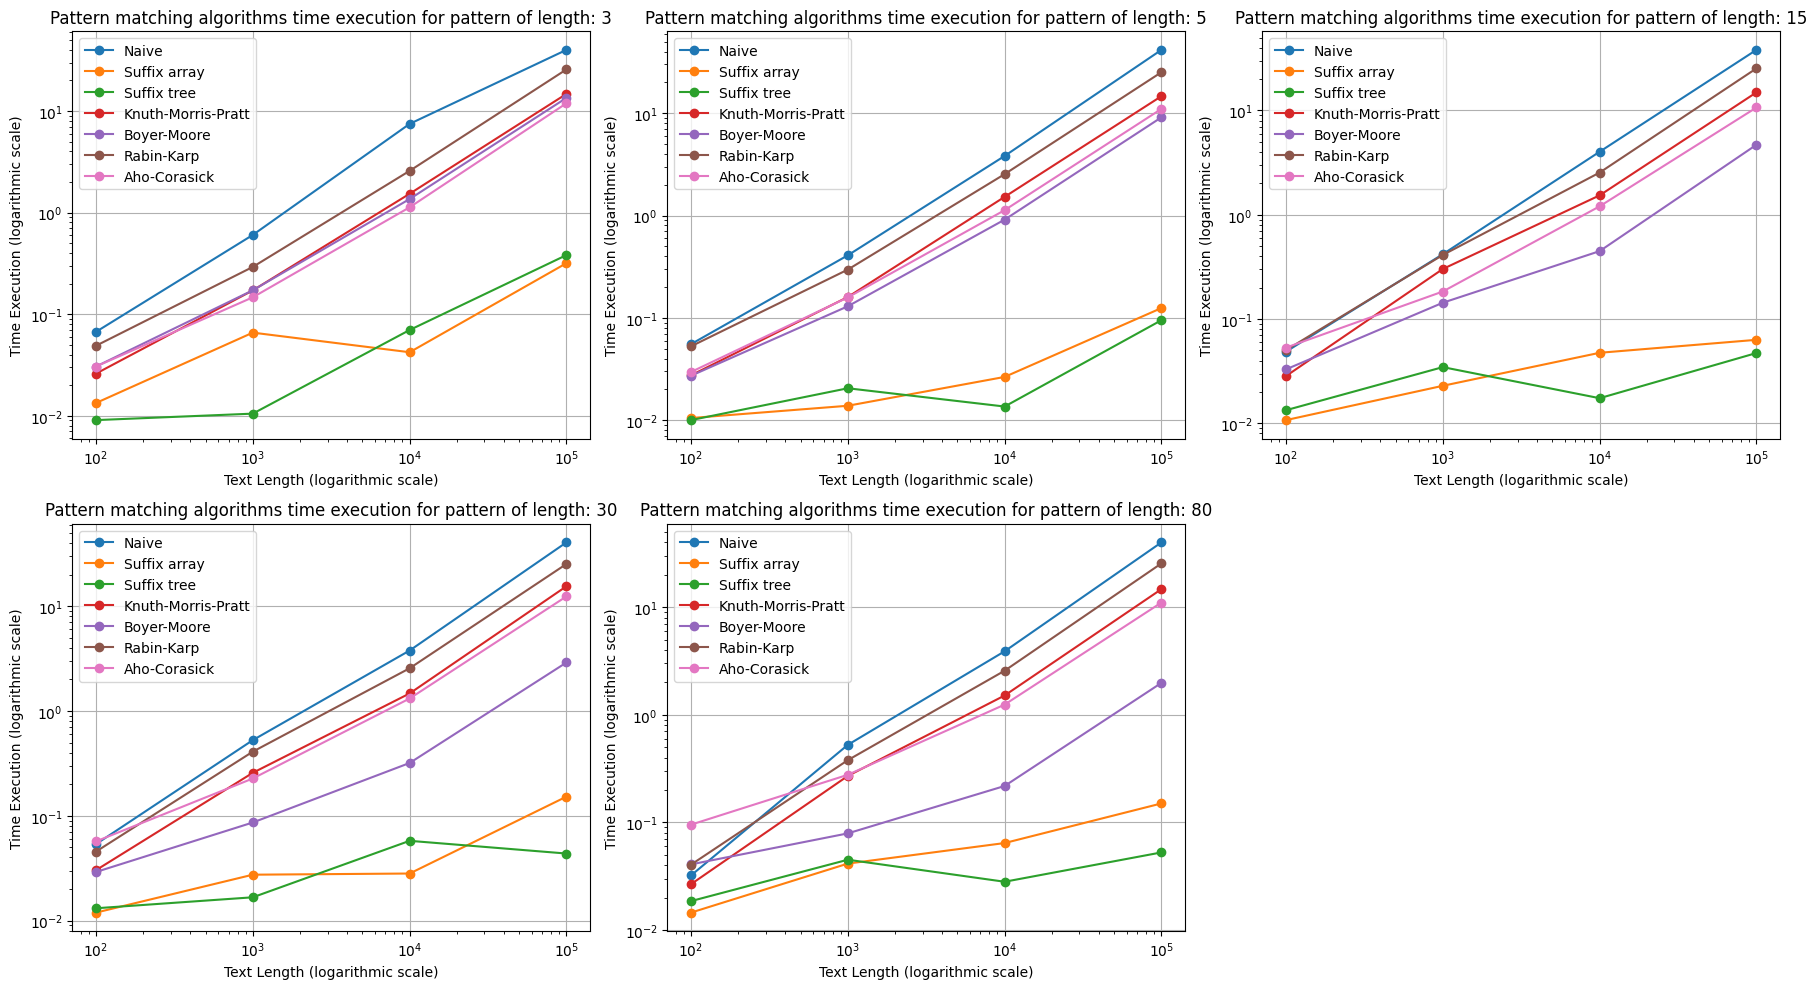

In [15]:
df_time_reset = df_time.reset_index()

algorithms = df_time_reset['Algorithm'].unique()
pattern_lengths = df_time_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_time_reset[(df_time_reset['Algorithm'] == algo) & 
                               (df_time_reset['Pattern Length'] == pattern_len)]
        
        plt.plot(subset['Text Length'], subset['Time execution'], marker='o', label=algo)
    
    plt.xlabel('Text Length (logarithmic scale)')
    plt.ylabel('Time Execution (logarithmic scale)')
    plt.title(f'Pattern matching algorithms time execution for pattern of length: {pattern_len}')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Memory usage

In [16]:
df_mem = pd.Series(dmem)
df_mem.name = 'Memory usage'
df_mem.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_mem.unstack()

Pattern Length                         3          5          15         30  \
Algorithm          Text Length                                               
Aho-Corasick       100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Boyer-Moore        100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Knuth-Morris-Pratt 100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Naive              100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Rabin-Karp         100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Suffix array       100          5057204.0  5057204.0  5057204.0  5057204.0   
                   1000         5057204.0  5057204.0  5057204.0  5057204.0   
                   10000        5057204.0  5057204.0  5057844.0  5057844.0   
                   100000       5065396.0  5080480.0  5083424.0  5084960.0   
Suffix tree        100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0      640.0        0.0        0.0   
                   100000         11776.0        0.0        0.0      512.0   

Pattern Length                         80  
Algorithm          Text Length             
Aho-Corasick       100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Boyer-Moore        100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Knuth-Morris-Pratt 100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Naive              100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Rabin-Karp         100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Suffix array       100          5057204.0  
                   1000         5057204.0  
                   10000        5057844.0  
                   100000       5085472.0  
Suffix tree        100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0

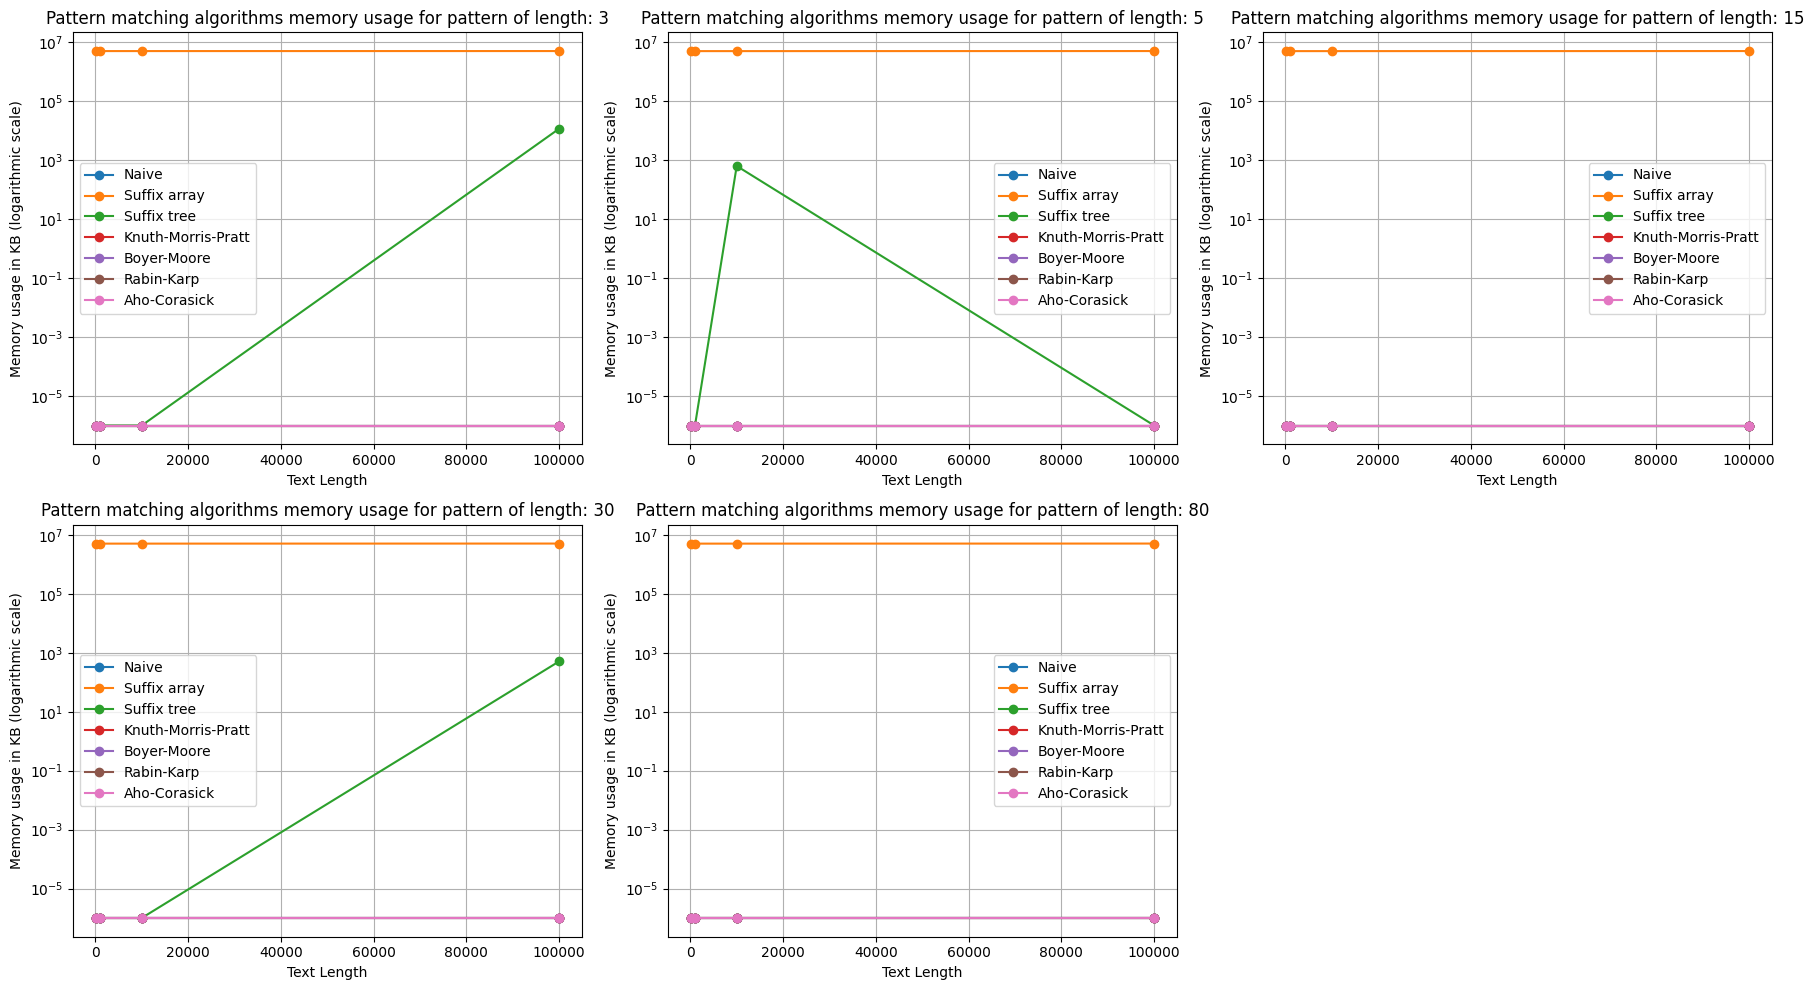

In [17]:
df_mem_reset = df_mem.reset_index()

algorithms = df_mem_reset['Algorithm'].unique()
pattern_lengths = df_mem_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_mem_reset[(df_mem_reset['Algorithm'] == algo) & 
                               (df_mem_reset['Pattern Length'] == pattern_len)]
        
        plt.plot(subset['Text Length'], subset['Memory usage'].replace(0, 1e-6), marker='o', label=algo)
    
    plt.xlabel('Text Length')
    plt.ylabel('Memory usage in KB (logarithmic scale)')
    plt.title(f'Pattern matching algorithms memory usage for pattern of length: {pattern_len}')
    # plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Number of comparisons

In [18]:
df_comp = pd.Series(dcomp)
df_comp.name = 'Characters comparison'
df_comp.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_comp.unstack()

Pattern Length                      3       5       15      30      80
Algorithm          Text Length                                        
Aho-Corasick       100             198     188     185     171     121
                   1000           1998    1996    1986    1967    1894
                   10000         19952   19992   19915   19929   19879
                   100000       199316  199347  199299  198678  198892
Boyer-Moore        100              37      41      24      34      81
                   1000            353     255     135     111     119
                   10000          3810    2390    1138     774     598
                   100000        38499   24275   12461    8171    5799
Knuth-Morris-Pratt 100             108     102     108     102     100
                   1000           1058    1000    1000    1049    1101
                   10000         10455   10000   10685   10012   10430
                   100000       104356  104964  101114  107615  100130
Naive              100             108     110     109     101     103
                   1000           1058    1000    1000    1055    1137
                   10000         10597   10004   10758   10054   10475
                   100000       105998  105613  101801  108934  101159
Rabin-Karp         100               0      15      15      30      80
                   1000              0       5      15      30      80
                   10000            72      10      30      30      80
                   100000         1026     380     150     300     880
Suffix array       100               0      23      29      37      87
                   1000              0      16      25      47     118
                   10000            90      23      85      65     111
                   100000         1042     402     194     336     931
Suffix tree        100               4       7      18      32      83
                   1000              4       6      16      34      85
                   10000             6       6      20      34      85
                   100000            6       9      19      35      84

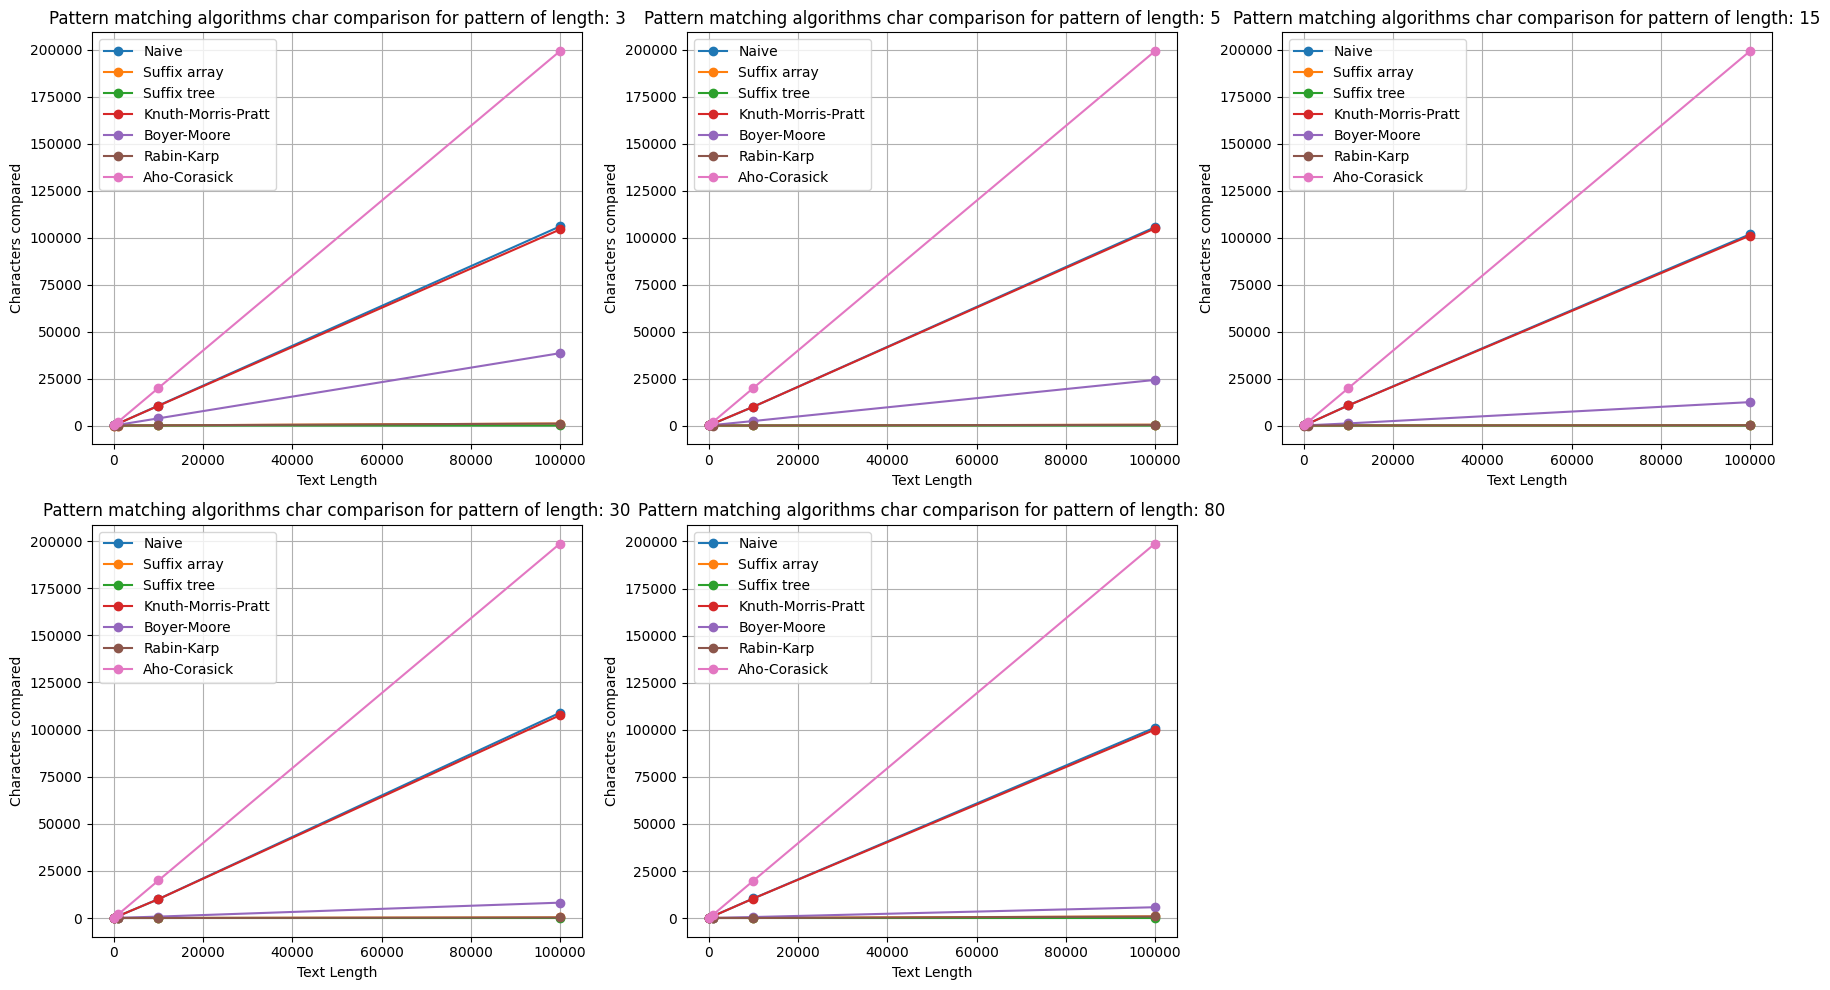

In [19]:
df_comp_reset = df_comp.reset_index()

algorithms = df_comp_reset['Algorithm'].unique()
pattern_lengths = df_comp_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_comp_reset[(df_comp_reset['Algorithm'] == algo) & 
                               (df_comp_reset['Pattern Length'] == pattern_len)]
        
        plt.plot(subset['Text Length'], subset['Characters comparison'], marker='o', label=algo)
    
    plt.xlabel('Text Length')
    plt.ylabel('Characters compared')
    plt.title(f'Pattern matching algorithms char comparison for pattern of length: {pattern_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

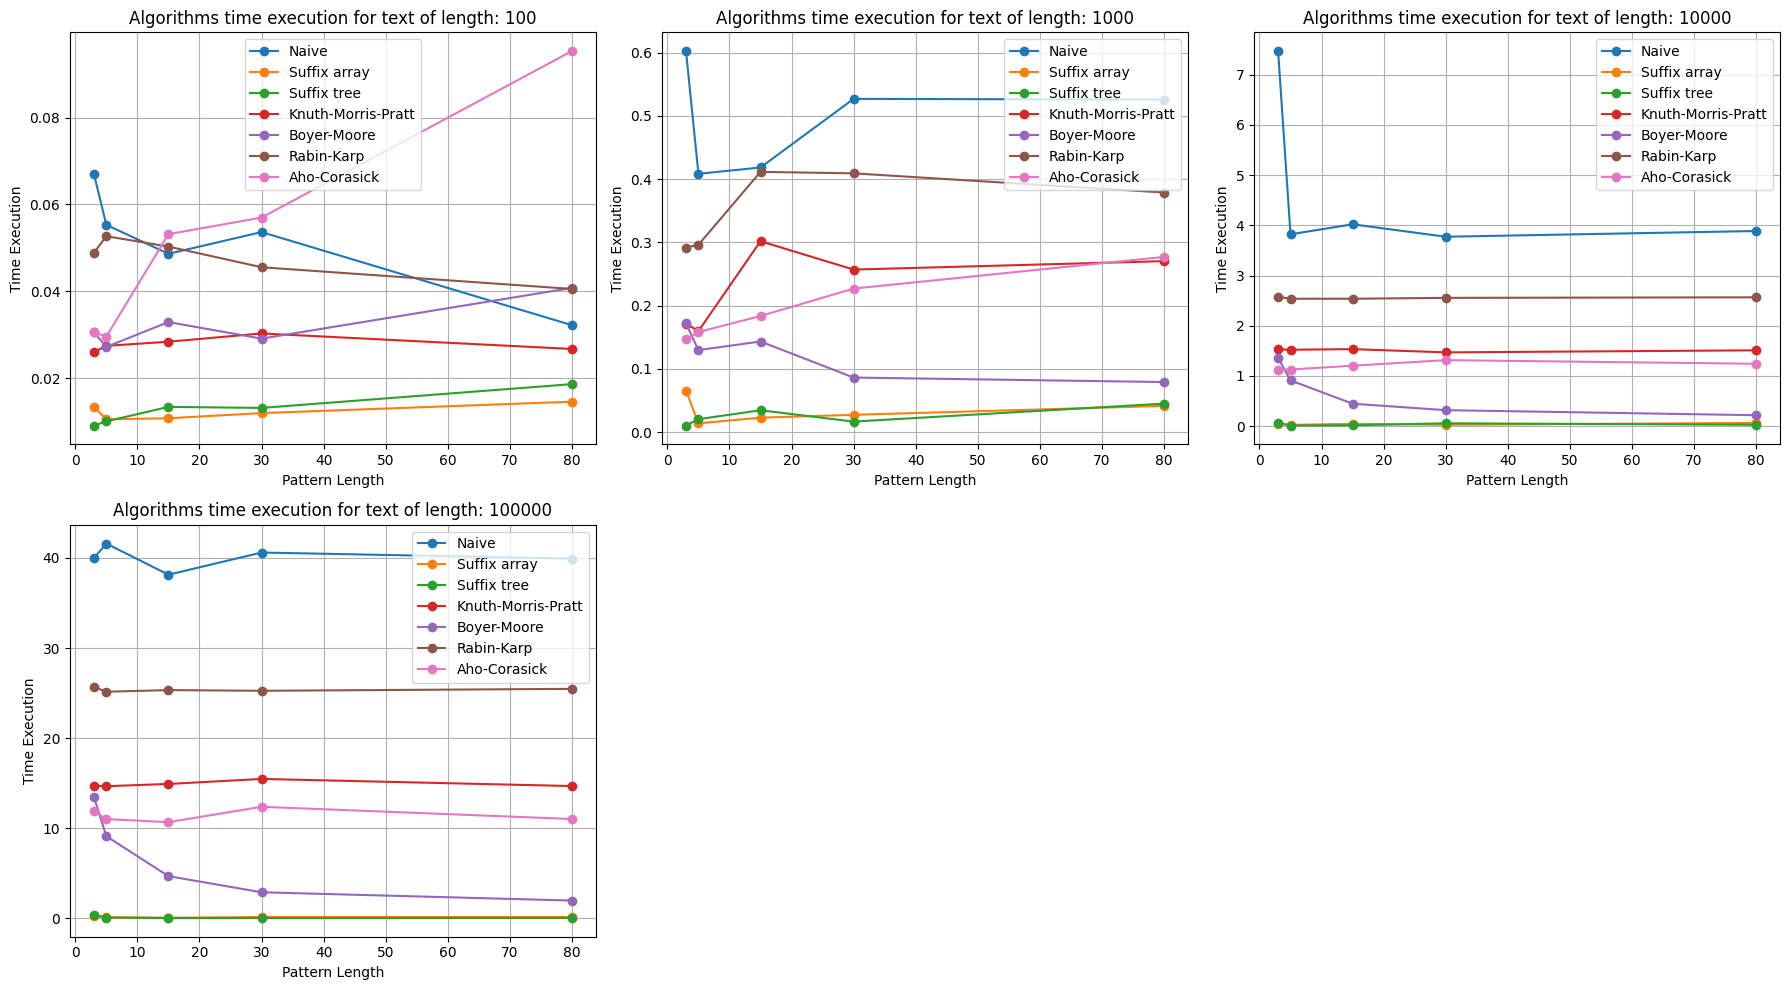

In [20]:
df_time_reset = df_time.reset_index()
df_time_reset

algorithms = df_time_reset['Algorithm'].unique()
pattern_lengths = df_time_reset['Pattern Length'].unique()
text_lengths = df_time_reset['Text Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, text_len in enumerate(sorted(text_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_time_reset[(df_time_reset['Algorithm'] == algo) & 
                               (df_time_reset['Text Length'] == text_len)]
        
        plt.plot(pattern_lengths, subset['Time execution'], marker='o', label=algo)
    
    plt.xlabel('Pattern Length')
    plt.ylabel('Time Execution')
    plt.title(f'Algorithms time execution for text of length: {text_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

## Plotting results with more samples

In [21]:
import random
import numpy as np

def randtext(size: int) -> str:
    return "".join( (chr(ord('a') + random.randint(0,25))) for _ in range(size) )

In [22]:
dtime = dict()
dmem = dict()
dcomp = dict()
sizes_t = np.linspace(10,5e4,10, dtype=int)
sizes_p = np.linspace(10,5e3,5, dtype=int)

for size_t in sizes_t:
    text = randtext(size_t)
    for size_p in sizes_p:
        pattern = randtext(size_p)
        result = compare_pattern_matching_algorithms(text, pattern)
        for algorithm in result.keys():
            dtime[(algorithm, size_t, size_p)] = result[algorithm]["execution_time_ms"]
            dmem[(algorithm, size_t, size_p)] = result[algorithm]["memory_usage_kb"]
            dcomp[(algorithm, size_t, size_p)] = result[algorithm]["compares"]

In [23]:
df_time = pd.Series(dtime)
df_time.name = 'Time execution'
df_time.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_time.unstack()

Pattern Length                10        1257        2505      3752        5000
Algorithm    Text Length                                                      
Aho-Corasick 10           0.049114  3.339291    3.092766  4.926205  121.912718
             5564         0.652313  1.747608    3.278732  4.303932    5.725384
             11118        1.312494  2.905607    4.070520  5.559683  149.347544
             16673        3.086567  2.973557  102.009535  5.733967    6.493807
             22227        2.481461  4.436731    5.279303  6.313562    7.955313
...                            ...       ...         ...       ...         ...
Suffix tree  27782        0.012159  0.010729    0.014305  0.014782    0.009537
             33336        0.023127  0.017405    0.016212  0.009775    0.018835
             38891        0.010729  0.010967    0.011683  0.018120    0.010014
             44445        0.010729  0.017881    0.010252  0.015736    0.010490
             50000        0.016689  0.011444    0.012636  0.020981    0.010490

[70 rows x 5 columns]

### Time execution vs text length

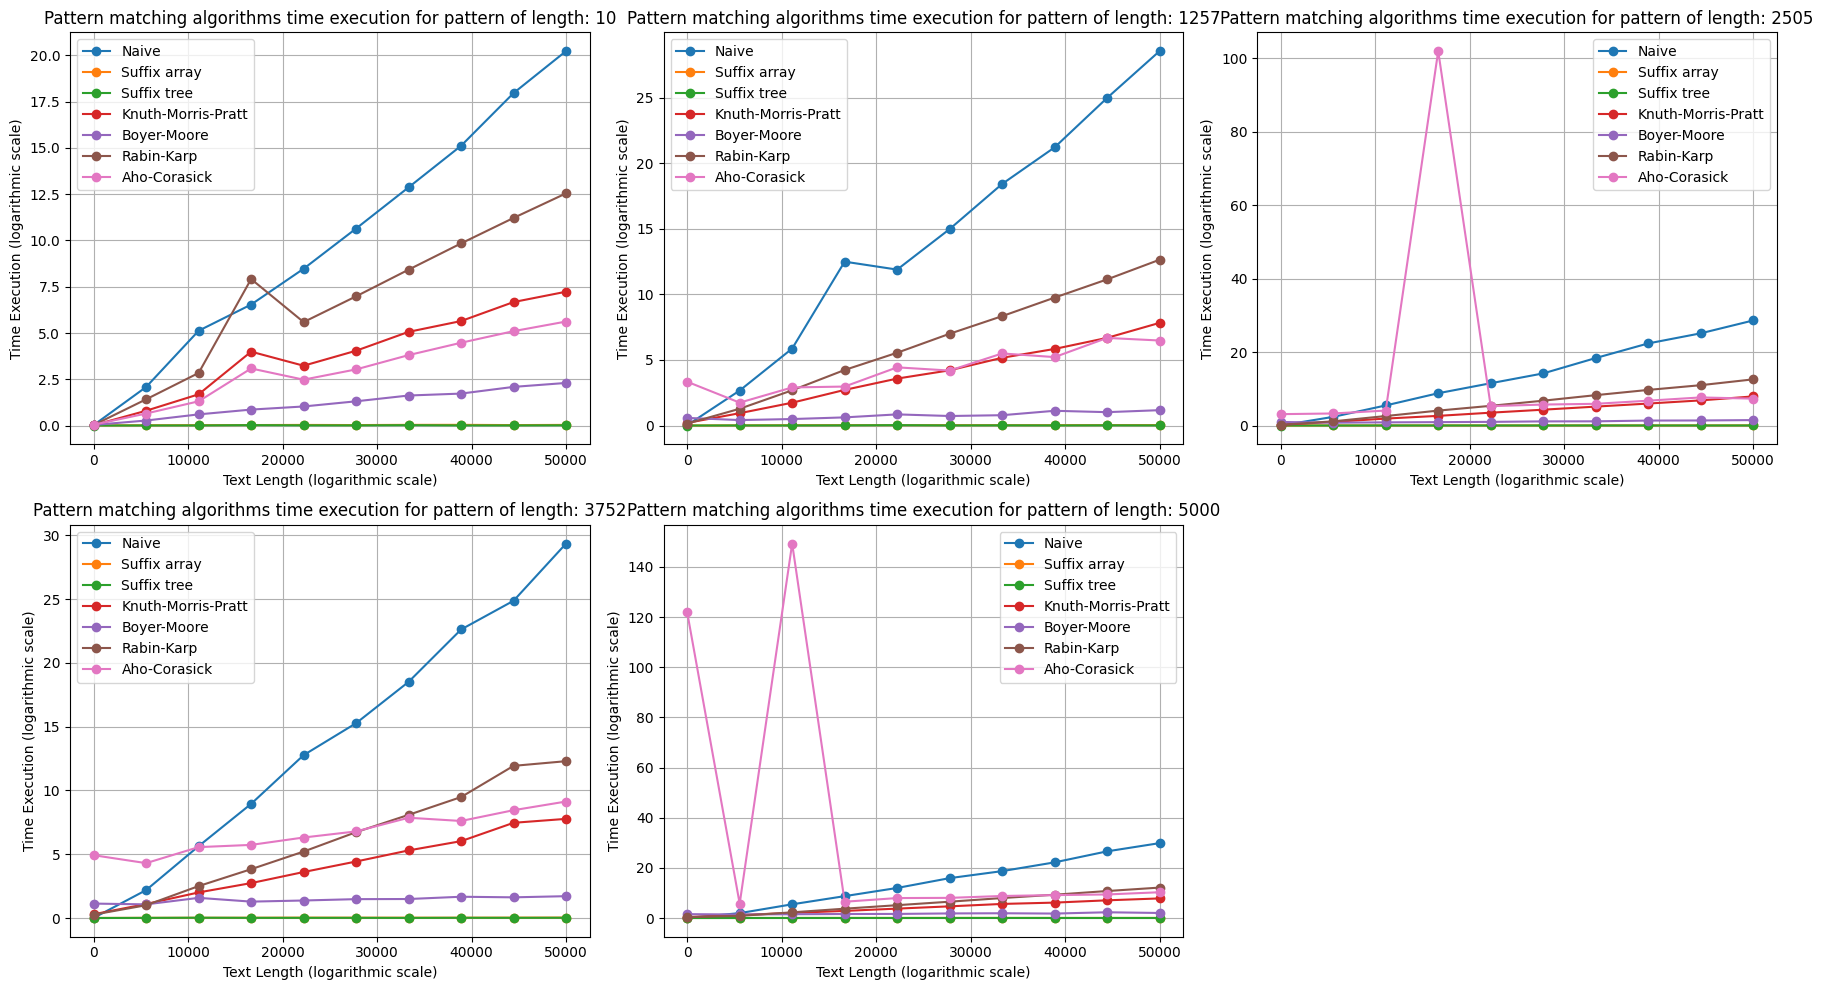

In [24]:
df_time_reset = df_time.reset_index()

algorithms = df_time_reset['Algorithm'].unique()
pattern_lengths = df_time_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    ax = plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_time_reset[(df_time_reset['Algorithm'] == algo) & 
                               (df_time_reset['Pattern Length'] == pattern_len)]
        plt.plot(subset['Text Length'], subset['Time execution'], marker='o', label=algo)
    
    plt.xlabel('Text Length (logarithmic scale)')
    plt.ylabel('Time Execution (logarithmic scale)')
    plt.title(f'Pattern matching algorithms time execution for pattern of length: {pattern_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Memory usage vs text length

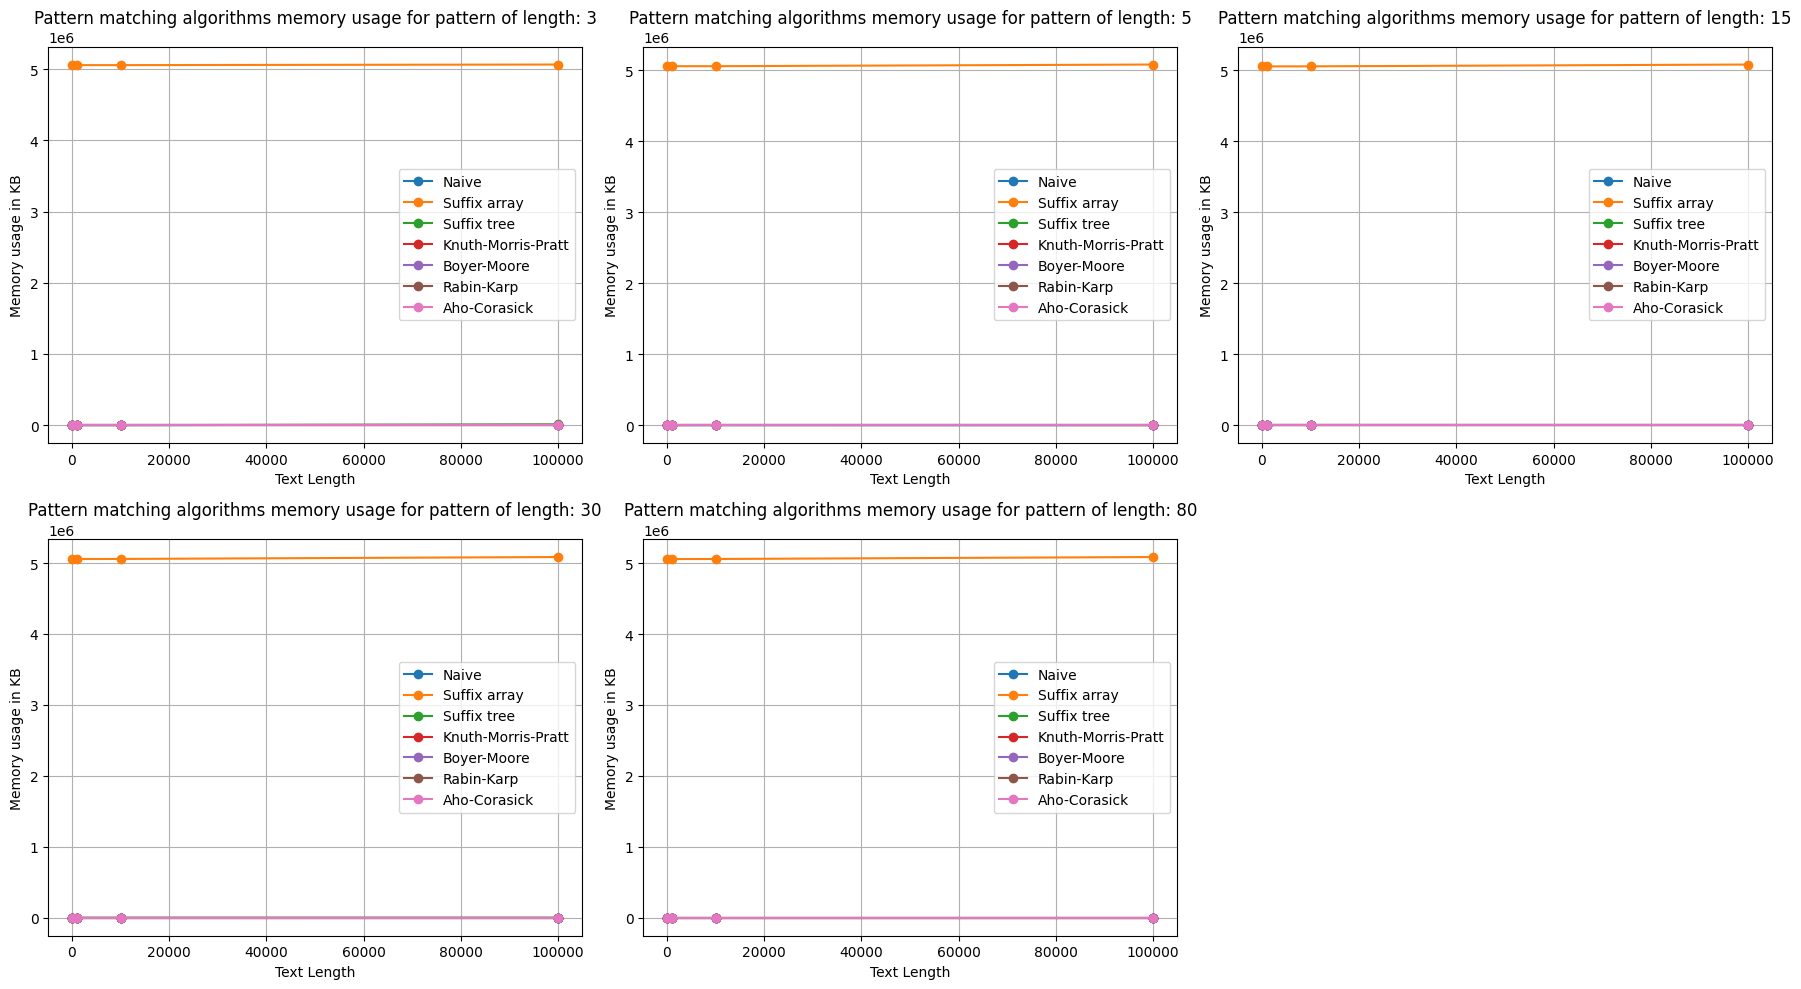

In [25]:
df_mem_reset = df_mem.reset_index()

algorithms = df_mem_reset['Algorithm'].unique()
pattern_lengths = df_mem_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    ax = plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_mem_reset[(df_mem_reset['Algorithm'] == algo) & 
                               (df_mem_reset['Pattern Length'] == pattern_len)]
        plt.plot(subset['Text Length'], subset['Memory usage'], marker='o', label=algo)
            
    plt.xlabel('Text Length')
    plt.ylabel('Memory usage in KB')
    plt.title(f'Pattern matching algorithms memory usage for pattern of length: {pattern_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Number of comparisons vs text length

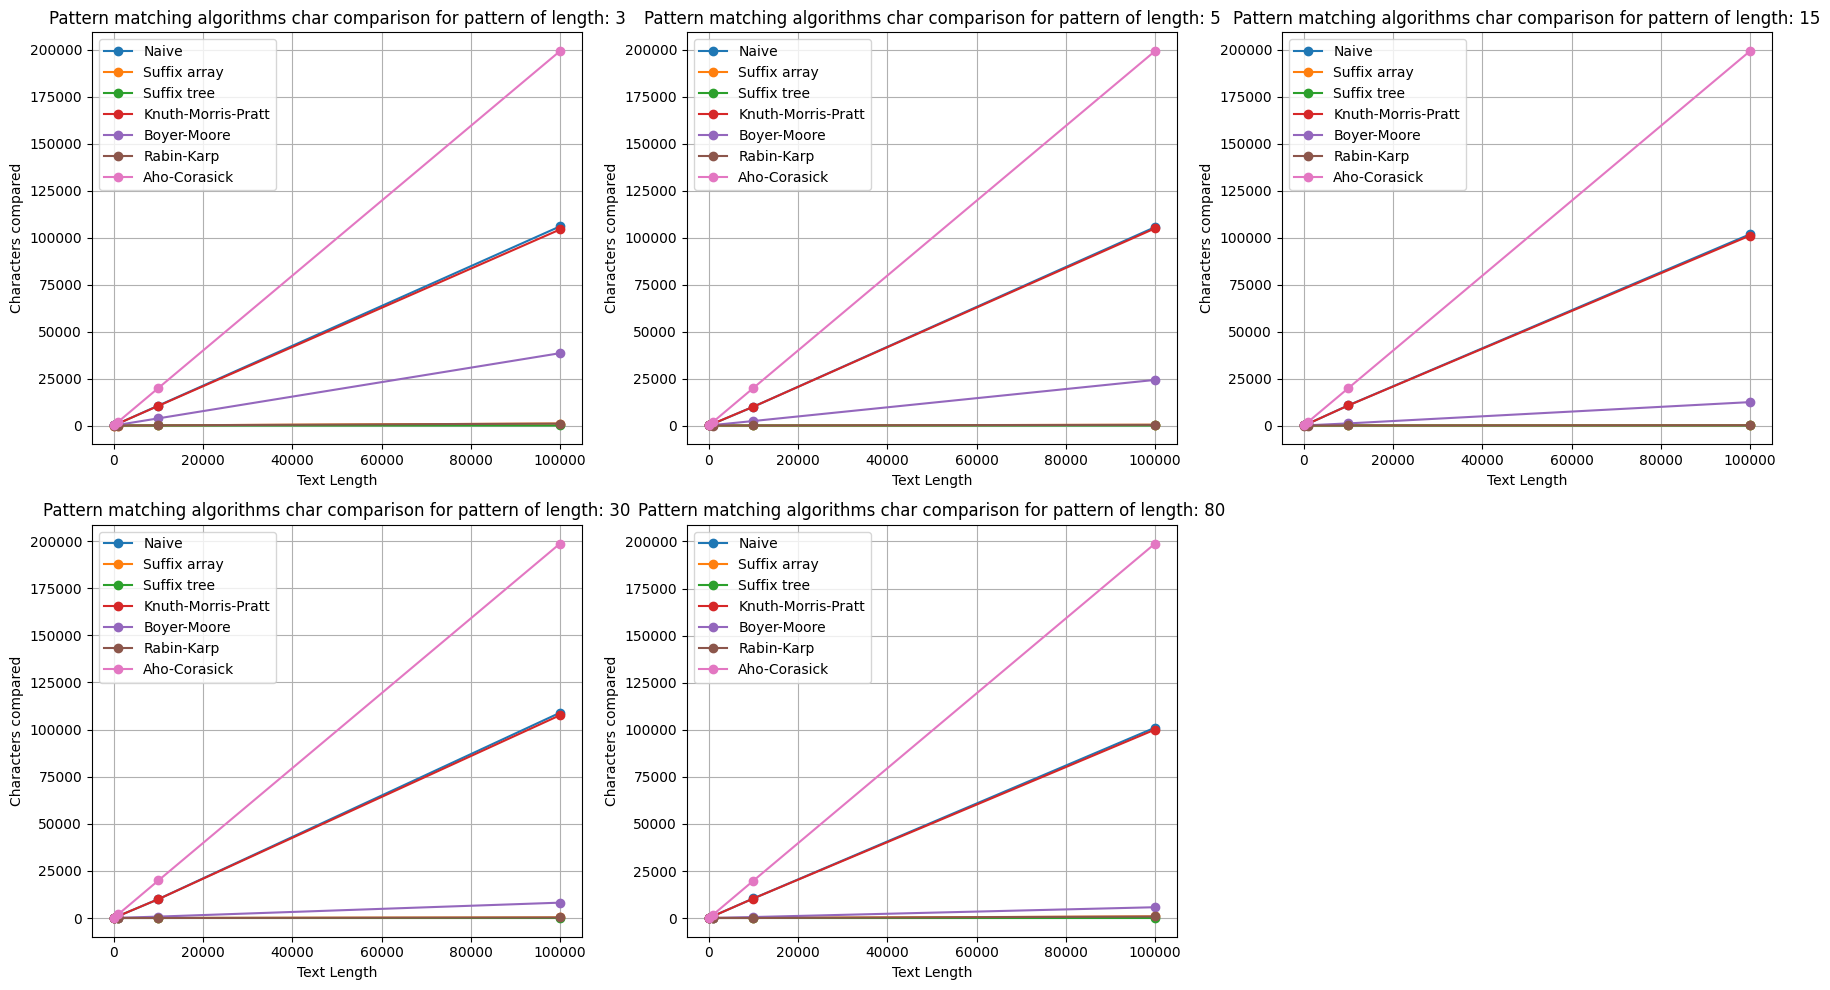

In [26]:
df_comp_reset = df_comp.reset_index()

algorithms = df_comp_reset['Algorithm'].unique()
pattern_lengths = df_comp_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    ax = plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_comp_reset[(df_comp_reset['Algorithm'] == algo) & 
                               (df_comp_reset['Pattern Length'] == pattern_len)]
        plt.plot(subset['Text Length'], subset['Characters comparison'], marker ='o', label=algo)
    
    plt.xlabel('Text Length')
    plt.ylabel('Characters compared')
    plt.title(f'Pattern matching algorithms char comparison for pattern of length: {pattern_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Time execution vs pattern length

In [27]:
dtime = dict()
sizes_p = np.linspace(10,5e3,10, dtype=int)

text = randtext(100000)
for size_p in sizes_p:
    pattern = randtext(size_p)
    result = compare_pattern_matching_algorithms(text, pattern)
    for algorithm in result.keys():
        dtime[(algorithm, size_p)] = result[algorithm]["execution_time_ms"]

In [28]:
df_time = pd.Series(dtime)
df_time.name = 'Time execution'
df_time.index.names = ['Algorithm', 'Pattern Length']
df_time.unstack()

Pattern Length,10,564,1118,1673,2227,2782,3336,3891,4445,5000
Algorithm,,,,,,,,,,
Aho-Corasick,10.979176,12.290001,13.687134,12.565374,13.678551,158.552408,13.948917,14.508247,16.295910,16.672850
Boyer-Moore,4.771233,1.451254,1.781464,1.462936,1.933813,2.121687,2.192497,2.244949,2.323627,2.692699
Knuth-Morris-Pratt,14.599562,14.992476,15.012741,15.859842,15.069962,15.352488,15.166759,15.091896,15.401125,15.332937
Naive,39.386272,46.693563,56.444168,59.341669,58.004856,59.778214,56.983948,62.584877,60.936451,63.888550
Rabin-Karp,25.131702,25.462866,25.800943,25.347233,25.271654,25.307655,25.046349,24.931431,27.125359,25.163174
Suffix array,0.042200,0.038147,0.033140,0.041485,0.035286,0.036240,0.038862,0.034571,0.036240,0.060320
Suffix tree,0.011683,0.014305,0.024557,0.015020,0.011444,0.011921,0.014067,0.013590,0.014544,0.012636


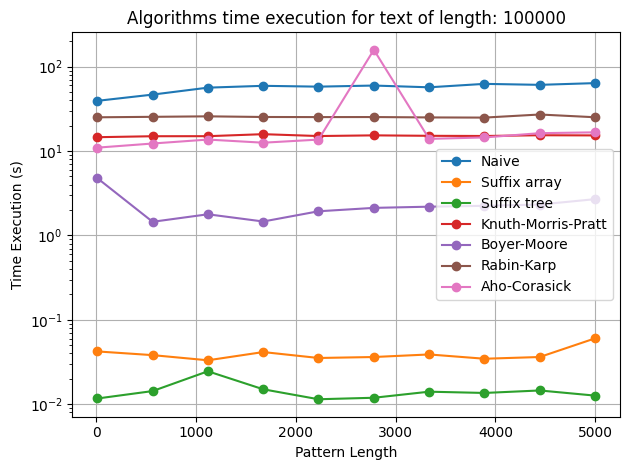

In [29]:
df_time_reset = df_time.reset_index()
df_time_reset

algorithms = df_time_reset['Algorithm'].unique()
pattern_lengths = df_time_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

ax = plt.gca()
    
for algo in algorithms:
    subset = df_time_reset[(df_time_reset['Algorithm'] == algo)]
    plt.plot(pattern_lengths, subset['Time execution'], marker='o', label=algo)

plt.xlabel('Pattern Length')
plt.ylabel('Time Execution (s)')
plt.title(f'Algorithms time execution for text of length: 100000')
# plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Conclusions
Naive algorithm takes more time to execute for longer texts, for smaller texts may work faster than complex algorithms like Aho-Corasick. In general suffix structures show quicker pattern finding thanks to preprocessing of these structures, however suffix array seems to use more memory during searching. Algorithms such as Boyer-Moore, Knuth-Morris-Pratt and Rabin-Karp seems to work similarly in terms of time execution for same text and different patterns with different lengths.

In terms of finding multiple patterns in given text Aho-Corasick is suited for this task.
In terms of simplicity, one can use naive approach.
When working with larger texts with thousands of characters, the best would be constructing suffix tree and then using it to find patterns. Preprocessing is done in linear time when using complex Ukkonen algorithm, but when that is done, pattern finding seems to work the fastest among other algorithms.